In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [2]:
# Download training from open datasets
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# Download test data from open datasets
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
# Size of training and testing dataset

print(len(training_data))
print(len(test_data))


train_loader = DataLoader(training_data, 200, shuffle=True)
test_loader = DataLoader(test_data, len(test_data))
train_eval_loader = DataLoader(training_data, len(training_data))

60000
10000


In [9]:
# Create dataloader for the training dataset

X_train = torch.empty(0, 28, 28)
y_train = torch.empty(0, 10)

X_train_full, y_train_full = next(iter(train_eval_loader))

1


tensor(0)
tensor(2)
tensor(3)
tensor(5)
tensor(9)
tensor(1)


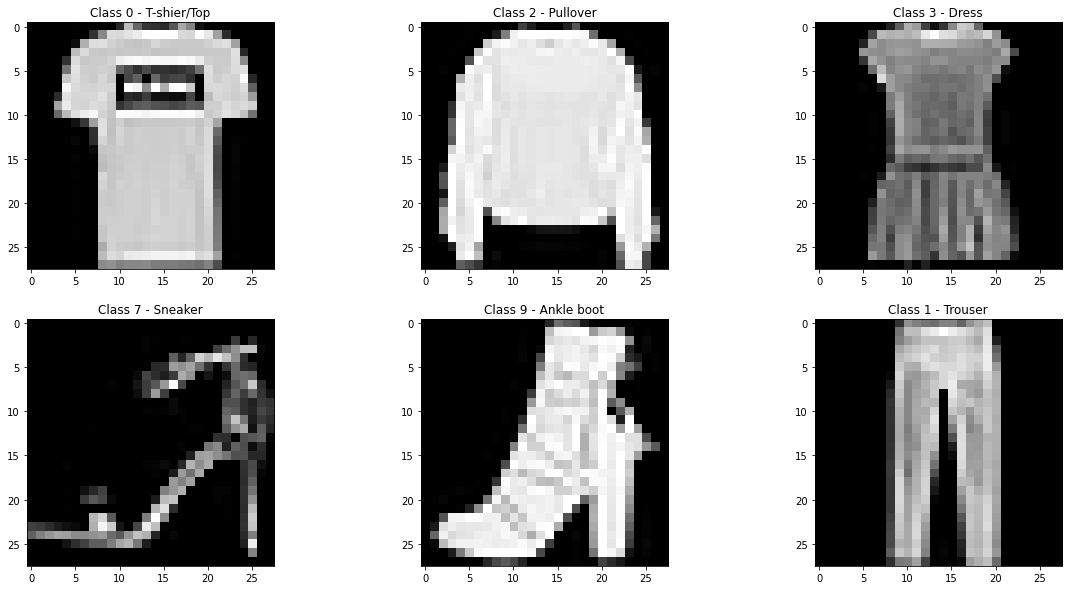

In [48]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 10)
axs[0, 0].imshow(X_train_full[1].squeeze(dim=0), cmap='gray')
axs[0, 0].set_title("Class 0 - T-shier/Top")
axs[0, 1].imshow(X_train_full[7].squeeze(dim=0), cmap='gray')
axs[0, 1].set_title("Class 2 - Pullover")
axs[0, 2].imshow(X_train_full[3].squeeze(dim=0), cmap='gray')
axs[0, 2].set_title("Class 3 - Dress")

axs[1, 0].imshow(X_train_full[8].squeeze(dim=0), cmap='gray')
axs[1, 0].set_title("Class 7 - Sneaker")
axs[1, 1].imshow(X_train_full[11].squeeze(dim=0), cmap='gray')
axs[1, 1].set_title("Class 9 - Ankle boot")
axs[1, 2].imshow(X_train_full[16].squeeze(dim=0), cmap='gray')
axs[1, 2].set_title("Class 1 - Trouser")

print(y_train_full[1])
print(y_train_full[7])
print(y_train_full[3])
print(y_train_full[8])
print(y_train_full[11])
print(y_train_full[16])

In [5]:
# Function to evaluate the performence

def evaluate(y_preds, y_obs):
    return sum(y_preds==y_obs)/len(y_preds)

Epoch: 0, - Training Cost: 0.7079108357429504, - Training Accuracy: 0.7384666800498962
Epoch: 0, - Testing cost: 0.7282107472419739 - Testing Accurarcy: 0.7283999919891357
........

Epoch: 1, - Training Cost: 0.49920809268951416, - Training Accuracy: 0.8230666518211365
Epoch: 1, - Testing cost: 0.522672176361084 - Testing Accurarcy: 0.8147000074386597
........

Epoch: 2, - Training Cost: 0.4260653555393219, - Training Accuracy: 0.8492666482925415
Epoch: 2, - Testing cost: 0.4565306007862091 - Testing Accurarcy: 0.8371999859809875
........

Epoch: 3, - Training Cost: 0.4142107367515564, - Training Accuracy: 0.8501499891281128
Epoch: 3, - Testing cost: 0.45099076628685 - Testing Accurarcy: 0.8375999927520752
........

Epoch: 4, - Training Cost: 0.3958108425140381, - Training Accuracy: 0.8548166751861572
Epoch: 4, - Testing cost: 0.44031932950019836 - Testing Accurarcy: 0.8342999815940857
........

Epoch: 5, - Training Cost: 0.4321810305118561, - Training Accuracy: 0.845633327960968
Epoch

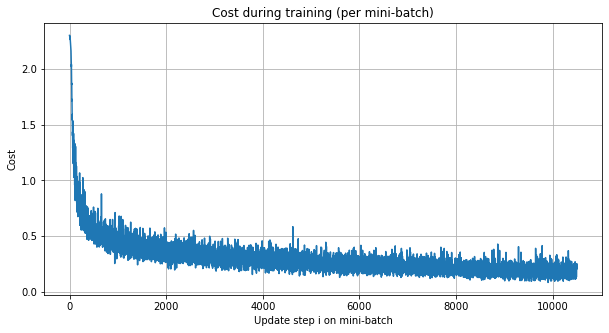

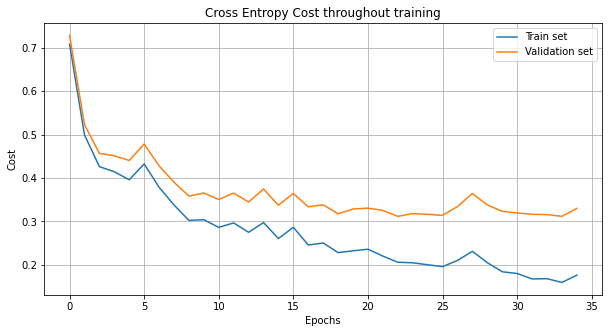

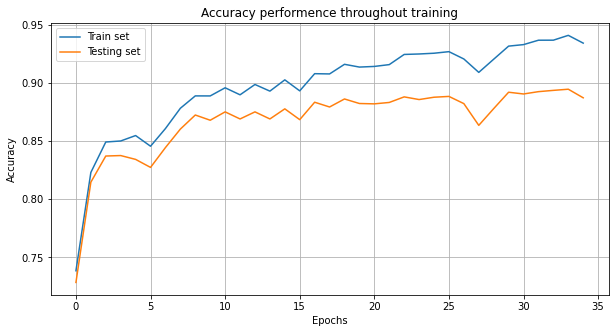

In [8]:
# Declare model: 784-600-300-110-10
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=600),
    nn.ReLU(),
    nn.Linear(in_features=600, out_features=300),
    nn.ReLU(),
    nn.Linear(in_features=300, out_features=110),
    nn.ReLU(),
    nn.Linear(in_features=110, out_features=10)
)



# Select the optimizer
optim = torch.optim.SGD(model.parameters(), lr=0.1)

# Cost function is MSE, same for all five architectures to be tested
cost_function = nn.CrossEntropyLoss()

# Train the netwoek
training_minibatch_Js = []
training_epochs_Js = []
train_epoch_acc = []
testing_epoch_Js = []
testing_epoch_acc = []


nr_epochs = 35
for epoch_i in range(nr_epochs):
    for X_batch, y_batch in train_loader:
        # Train using gradient Descent
        
        # Make a prediction on the minibatch
        y_preds = model(X_batch)
                        
        # Calculate the cost
        cost = cost_function(y_preds, y_batch)
        
        # Add curent cost so it can be plotted
        training_minibatch_Js.append(cost)
        
        # Zero the gradient
        optim.zero_grad()
        
        # Calculate the gradient
        cost.backward()
        
        # Take a step in the gradient descent direction
        optim.step()
        
    # Test data
    for X_test_batch, y_test_batch in test_loader:
        with torch.no_grad():
            raw_y_preds_test = model(X_test_batch)
        testing_epoch_Js.append(cost_function(raw_y_preds_test, y_test_batch))
   
        y_test_pred = raw_y_preds_test.argmax(dim=1)
        testing_epoch_acc.append(evaluate(y_test_pred, y_test_batch))
    
    with torch.no_grad():
        raw_y_preds_train = model(X_train_full)
    training_epochs_Js.append(cost_function(raw_y_preds_train, y_train_full))
   
    y_train_pred = raw_y_preds_train.argmax(dim=1)
    
    train_epoch_acc.append(evaluate(y_train_pred, y_train_full))
    
    
    print(f"Epoch: {epoch_i}, - Training Cost: {training_epochs_Js[-1]}, - Training Accuracy: {train_epoch_acc[-1]}")
    print(f"Epoch: {epoch_i}, - Testing cost: {testing_epoch_Js[-1]} - Testing Accurarcy: {testing_epoch_acc[-1]}")
    print("........")
    print("")
        
# Plot cost during training
plt.figure(figsize=[10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel("Update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training (per mini-batch)")
plt.grid()
print(training_minibatch_Js[-1])

# Plot the Cross Entropy Loss
plt.figure(figsize=[10, 5])
plt.plot(training_epochs_Js, label="Train set")
plt.plot(testing_epoch_Js, label="Validation set")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cross Entropy Cost throughout training")
plt.legend()
plt.grid()

# Plot the accuracy
plt.figure(figsize=[10, 5])
plt.plot(train_epoch_acc, label="Train set")
plt.plot(testing_epoch_acc, label="Testing set")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy performence throughout training")
plt.legend()
plt.grid()
    

In [41]:
print(len(training_epochs_Js))
print(len(train_epoch_acc))

25
25


tensor(7) tensor(5)
tensor(4) tensor(2)
tensor(9) tensor(5)
tensor(3) tensor(6)
tensor(6) tensor(0)
tensor(2) tensor(6)
tensor([[12],
        [17],
        [23],
        [29],
        [40],
        [42],
        [43],
        [48],
        [49],
        [51]])


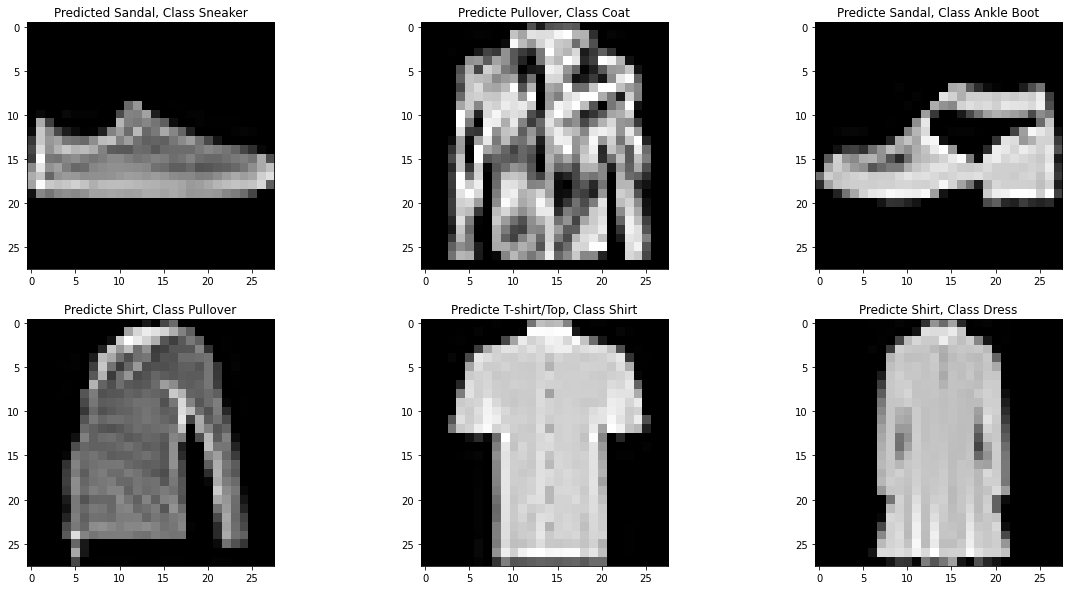

In [71]:
for X_test_batch, y_test_batch in test_loader:
    with torch.no_grad():
        raw_y_preds_test = model(X_test_batch)
    y_test_pred = raw_y_preds_test.argmax(dim=1)
    bool_arr = y_test_pred==y_test_batch
    
    
    fig, axs = plt.subplots(2, 3)
    fig.set_size_inches(20, 10)
    axs[0, 0].imshow(X_test_batch[12][0].squeeze(dim=0), cmap='gray')
    axs[0, 0].set_title("Predicted Sandal, Class Sneaker")
    axs[0, 1].imshow(X_test_batch[17][0].squeeze(dim=0), cmap='gray')
    axs[0, 1].set_title("Predicte Pullover, Class Coat")
    axs[0, 2].imshow(X_test_batch[23][0].squeeze(dim=0), cmap='gray')
    axs[0, 2].set_title("Predicte Sandal, Class Ankle Boot")

    axs[1, 0].imshow(X_test_batch[48][0].squeeze(dim=0), cmap='gray')
    axs[1, 0].set_title("Predicte Shirt, Class Pullover")
    axs[1, 1].imshow(X_test_batch[40][0].squeeze(dim=0), cmap='gray')
    axs[1, 1].set_title("Predicte T-shirt/Top, Class Shirt")
    axs[1, 2].imshow(X_test_batch[29][0].squeeze(dim=0), cmap='gray')
    axs[1, 2].set_title("Predicte Shirt, Class Dress")

    print(y_test_batch[12], y_test_pred[12])
    print(y_test_batch[17], y_test_pred[17])
    print(y_test_batch[23], y_test_pred[23])
    print(y_test_batch[29], y_test_pred[29])
    print(y_test_batch[40], y_test_pred[40])
    print(y_test_batch[48], y_test_pred[48])
    
print((~bool_arr).nonzero()[0:10])